# ML Experiment-4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

Dataset Loading

In [ ]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Data Preprocessing

In [ ]:
print("Missing values:")
print(data.isnull().sum())

X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

numerical_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData preprocessing complete.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Missing values:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Data preprocessing complete.
X_train shape: (239, 12)
X_test shape: (60, 12)
y_train shape: (239,)
y_test shape: (60,)


In [ ]:
print("Missing values:")
print(data.isnull().sum())

def preprocess_data(df, target_column, categorical_cols=None, drop_cols=None):
    if drop_cols:
        df = df.drop(columns=drop_cols)

    if categorical_cols:
        for col in categorical_cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])

    df = df.fillna(df.median(numeric_only=True))

    X = df.drop(target_column, axis=1)
    y = df[target_column]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

X_scaled, y = preprocess_data(data.copy(), target_column='DEATH_EVENT')

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nData preprocessing complete using the function.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Missing values:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Data preprocessing complete using the function.
X_train shape: (239, 12)
X_test shape: (60, 12)
y_train shape: (239,)
y_test shape: (60,)


In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Linear Regression

In [ ]:
X_train_ej_frac = X_train[:, 4].reshape(-1, 1)
X_test_ej_frac = X_test[:, 4].reshape(-1, 1)

linear_reg_simple = LinearRegression()
linear_reg_simple.fit(X_train_ej_frac, y_train)
y_pred_simple = linear_reg_simple.predict(X_test_ej_frac)

mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("Simple Linear Regression Results (Ejection Fraction vs. DEATH_EVENT):")
print(f"Mean Squared Error (MSE): {mse_simple:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_simple:.4f}")
print(f"Mean Absolute Error (MAE): {mae_simple:.4f}")
print(f"R-squared (R2): {r2_simple:.4f}")
print("-" * 30)

X_train_multiple = X_train[:, [0, 3, 4, 5]]
X_test_multiple = X_test[:, [0, 3, 4, 5]]

linear_reg_multiple = LinearRegression()
linear_reg_multiple.fit(X_train_multiple, y_train)
y_pred_multiple = linear_reg_multiple.predict(X_test_multiple)

mse_multiple = mean_squared_error(y_test, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("Multiple Linear Regression Results (Ejection Fraction, Age, Diabetes, High Blood Pressure vs. DEATH_EVENT):")
print(f"Mean Squared Error (MSE): {mse_multiple:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_multiple:.4f}")
print(f"Mean Absolute Error (MAE): {mae_multiple:.4f}")
print(f"R-squared (R2): {r2_multiple:.4f}")

Simple Linear Regression Results (Ejection Fraction vs. DEATH_EVENT):
Mean Squared Error (MSE): 0.2338
Root Mean Squared Error (RMSE): 0.4835
Mean Absolute Error (MAE): 0.4302
R-squared (R2): 0.0381
------------------------------
Multiple Linear Regression Results (Ejection Fraction, Age, Diabetes, High Blood Pressure vs. DEATH_EVENT):
Mean Squared Error (MSE): 0.2267
Root Mean Squared Error (RMSE): 0.4762
Mean Absolute Error (MAE): 0.4118
R-squared (R2): 0.0671


Logistic Regression

Binomial

Binomial Logistic Regression Results:
Accuracy: 0.8000
Precision: 0.9333
Recall: 0.5600
F1-score: 0.7000

Confusion Matrix:
[[34  1]
 [11 14]]


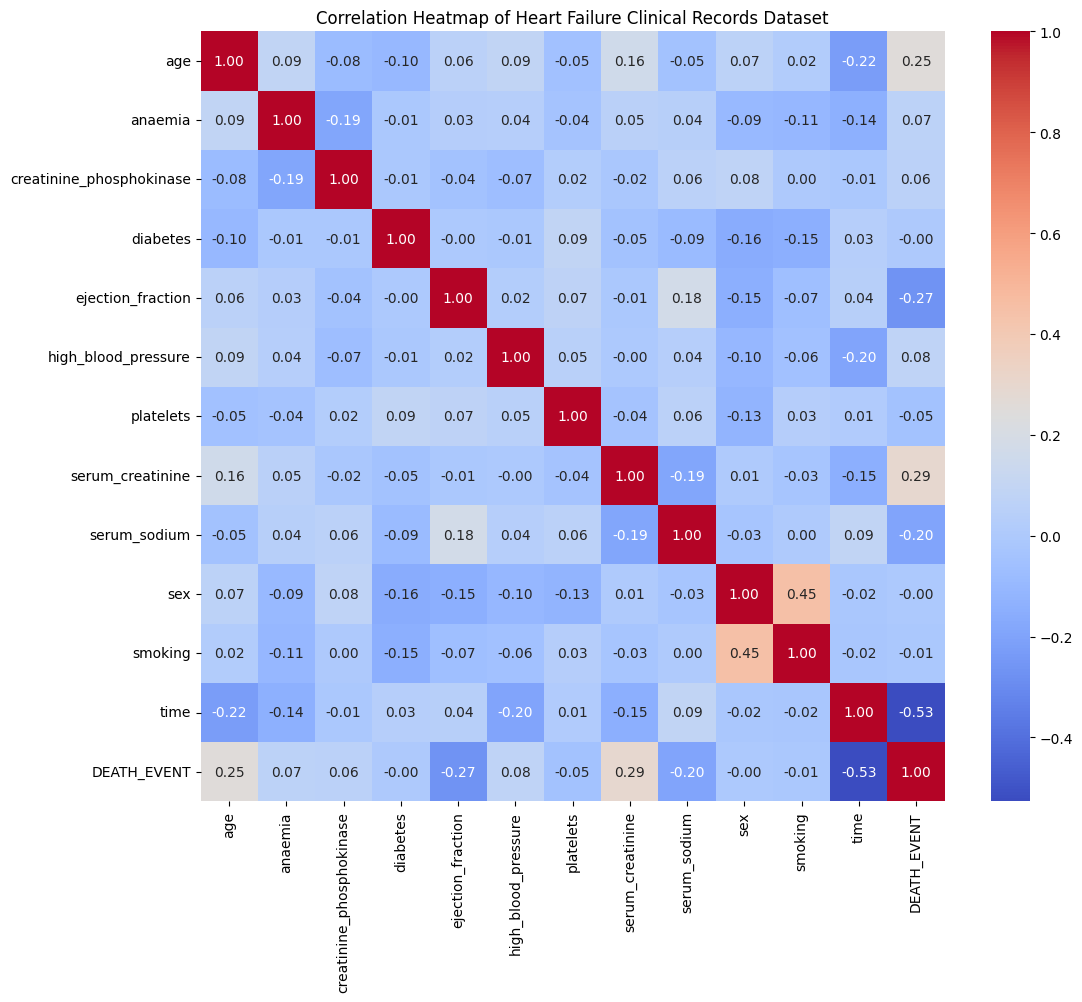

In [ ]:
logistic_reg_binomial = LogisticRegression()
logistic_reg_binomial.fit(X_train, y_train)
y_pred_binomial = logistic_reg_binomial.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_binomial)
precision = precision_score(y_test, y_pred_binomial)
recall = recall_score(y_test, y_pred_binomial)
f1 = f1_score(y_test, y_pred_binomial)
conf_matrix = confusion_matrix(y_test, y_pred_binomial)

print("Binomial Logistic Regression Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Heart Failure Clinical Records Dataset')
plt.show()

Ordinal

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Ordinal Logistic Regression Accuracy: 0.9650


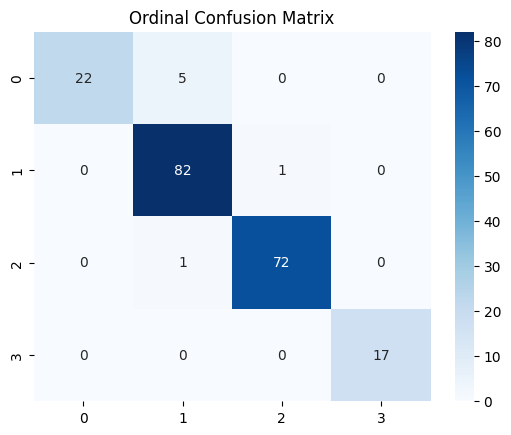

In [ ]:
df_ord = pd.read_csv('StudentsPerformance.csv')
display(df_ord.head())

def get_grade(row):
    avg_score = ((row['math score'] + row['reading score'] + row['writing score']) / 3)
    if avg_score >= 85: return 3
    elif avg_score >= 70: return 2
    elif avg_score >= 50: return 1
    else: return 0

df_ord['Grade'] = df_ord.apply(get_grade, axis=1)

X_ord, y_ord = preprocess_data(df_ord, 'Grade', categorical_cols=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])

X_train_ord, X_test_ord, y_train_ord, y_test_ord = train_test_split(X_ord, y_ord, test_size=0.2, random_state=42)

log_ord = LogisticRegression(multi_class='multinomial', max_iter=200)
log_ord.fit(X_train_ord, y_train_ord)
y_pred_ord = log_ord.predict(X_test_ord)

accuracy_ord = accuracy_score(y_test_ord, y_pred_ord)
print(f"Ordinal Logistic Regression Accuracy: {accuracy_ord:.4f}")

cm_ord = confusion_matrix(y_test_ord, y_pred_ord)
sns.heatmap(cm_ord, annot=True, fmt='d', cmap='Blues')
plt.title('Ordinal Confusion Matrix')
plt.show()